In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("audi.csv")
display(df)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


# Automated EDA

In [5]:
import ydata_profiling as pf
display(pf.ProfileReport(df))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
X = df.iloc[:,[0,1,3,4,5,6,7,8]].values
display (X.shape)
display (X)

(10668, 8)

array([[' A1', 2017, 'Manual', ..., 150, 55.4, 1.4],
       [' A6', 2016, 'Automatic', ..., 20, 64.2, 2.0],
       [' A1', 2016, 'Manual', ..., 30, 55.4, 1.4],
       ...,
       [' A3', 2020, 'Manual', ..., 150, 49.6, 1.0],
       [' Q3', 2017, 'Automatic', ..., 150, 47.9, 1.4],
       [' Q3', 2016, 'Manual', ..., 150, 47.9, 1.4]], dtype=object)

In [7]:
Y = df.iloc[:,[2]].values
display (Y.shape)
display (Y)


(10668, 1)

array([[12500],
       [16500],
       [11000],
       ...,
       [17199],
       [19499],
       [15999]], dtype=int64)

In [16]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
X[:,0] = le1.fit_transform(X[:,0])
le2 = LabelEncoder()
X[:,-4] = le2.fit_transform(X[:,-4])


In [19]:
pd.DataFrame(X).tail(20)

,0,1,2,3,4,5,6,7,8,9
10648,1.0,0.0,0.0,17,2016,24000,2,325,29.4,4.0
10649,0.0,1.0,0.0,2,2009,120000,0,145,53.3,2.0
10650,0.0,1.0,0.0,3,2011,88000,0,30,61.4,2.0
10651,0.0,1.0,0.0,2,2011,32300,2,235,39.2,2.0
10652,0.0,1.0,0.0,0,2014,54000,2,30,55.4,1.2
10653,0.0,1.0,0.0,2,2017,23820,2,145,60.1,1.0
10654,0.0,0.0,1.0,2,2016,46600,0,125,57.6,2.0
10655,1.0,0.0,0.0,20,2018,29000,2,150,35.8,3.0
10656,0.0,0.0,1.0,2,2016,52500,1,0,176.6,1.4
10657,0.0,0.0,1.0,3,2016,23700,0,30,61.4,2.0


In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[2])],remainder='passthrough')
X = ct.fit_transform(X)
display(X.shape)
display(pd.DataFrame(X))


(10668, 10)

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,0,2017,15735,2,150,55.4,1.4
1,1.0,0.0,0.0,5,2016,36203,0,20,64.2,2.0
2,0.0,1.0,0.0,0,2016,29946,2,30,55.4,1.4
3,1.0,0.0,0.0,3,2017,25952,0,145,67.3,2.0
4,0.0,1.0,0.0,2,2019,1998,2,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...,...
10663,0.0,1.0,0.0,2,2020,4018,2,145,49.6,1.0
10664,0.0,1.0,0.0,2,2020,1978,2,150,49.6,1.0
10665,0.0,1.0,0.0,2,2020,609,2,150,49.6,1.0
10666,1.0,0.0,0.0,9,2017,8646,2,150,47.9,1.4


In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
pd.DataFrame(X)


,0,1,2,3,4,5,6,7,8,9
0,-0.583268,1.200728,-0.712333,-1.123544,-0.046450,-0.386836,1.050783,0.357147,0.357550,-0.880218
1,1.714479,-0.832828,-0.712333,-0.160831,-0.507834,0.483989,-0.954181,-1.578323,1.037130,0.114925
2,-0.583268,1.200728,-0.712333,-1.123544,-0.507834,0.217781,1.050783,-1.429440,0.357550,-0.880218
3,1.714479,-0.832828,-0.712333,-0.545916,-0.046450,0.047853,-0.954181,0.282706,1.276528,0.114925
4,-0.583268,1.200728,-0.712333,-0.738459,0.876318,-0.971285,1.050783,0.282706,-0.090355,-1.543647
...,...,...,...,...,...,...,...,...,...,...
10663,-0.583268,1.200728,-0.712333,-0.738459,1.337702,-0.885343,1.050783,0.282706,-0.090355,-1.543647
10664,-0.583268,1.200728,-0.712333,-0.738459,1.337702,-0.972136,1.050783,0.357147,-0.090355,-1.543647
10665,-0.583268,1.200728,-0.712333,-0.738459,1.337702,-1.030381,1.050783,0.357147,-0.090355,-1.543647
10666,1.714479,-0.832828,-0.712333,0.609339,-0.046450,-0.688442,1.050783,0.357147,-0.221637,-0.880218


In [23]:
from sklearn.model_selection import train_test_split
(X_train,X_test,Y_train,Y_test) = train_test_split(X,Y,test_size=0.2,random_state=1)
print(X.shape, Y.shape)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)


(10668, 10) (10668, 1)
(8534, 10) (8534, 1)
(2134, 10) (2134, 1)


In [44]:
from sklearn.tree import DecisionTreeRegressor
regression = DecisionTreeRegressor(random_state=0)
regression.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=0)

In [45]:
y_pred = regression.predict(X_test)
display (y_pred)


array([19000., 17491., 23990., ..., 18298., 29995., 54500.])

In [46]:
print (pd.concat ([pd.DataFrame(Y_test.reshape(len(Y_test),1),columns =['Car Price']), 
                   pd.DataFrame(y_pred.reshape(len(y_pred),1),columns =['Price Prediction'])],axis =1))


      Car Price  Price Prediction
0         19000           19000.0
1         18799           17491.0
2         26664           23990.0
3         18990           20890.0
4         31000           30000.0
...         ...               ...
2129      15998           16599.0
2130      25000           23766.0
2131      17505           18298.0
2132      28500           29995.0
2133      54000           54500.0

[2134 rows x 2 columns]


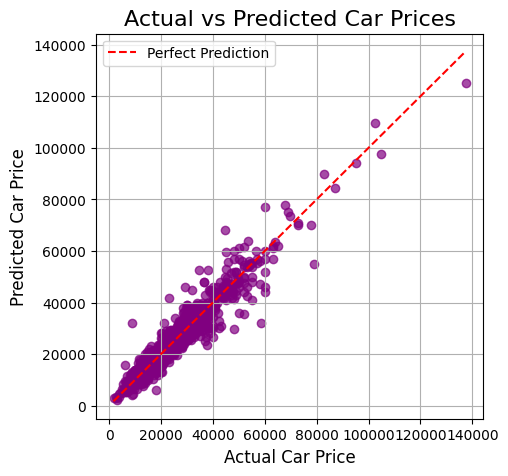

In [47]:
%matplotlib inline
comparison_df = pd.concat([
        pd.DataFrame(Y_test.reshape(len(Y_test), 1), columns=['Car Price']),
        pd.DataFrame(y_pred.reshape(len(y_pred), 1), columns=['Price Prediction'])
    ],axis=1)
plt.figure(figsize=(5, 5))
plt.scatter(comparison_df['Car Price'], comparison_df['Price Prediction'], alpha=0.7, color='purple')
plt.plot([min(comparison_df['Car Price']), max(comparison_df['Car Price'])],
         [min(comparison_df['Car Price']), max(comparison_df['Car Price'])],
         color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Car Prices', fontsize=16)
plt.xlabel('Actual Car Price', fontsize=12)
plt.ylabel('Predicted Car Price', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [48]:
from sklearn.metrics import r2_score,mean_absolute_error
print  ('R2 Score ', r2_score(Y_test, y_pred))
print  ('Mean Absolute Error', mean_absolute_error(Y_test,y_pred))


R2 Score  0.9260740410415859
Mean Absolute Error 1954.5582630427991


In [49]:
f_pred = regression.predict(X)
display (f_pred)


array([12500., 16500., 11000., ..., 17199., 18998., 15999.])

In [50]:
display(pd.concat ([df,pd.DataFrame(f_pred.reshape(len(f_pred),1),columns =['Price Prediction'])],axis =1))


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Price Prediction
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,12500.0
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,16500.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,11000.0
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,16800.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,17300.0
...,...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0,16999.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0,16999.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0,17199.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4,18998.0


In [51]:
print  ('R2 Score ', r2_score(Y, f_pred))
print  ('Mean Absolute Error', mean_absolute_error(Y,f_pred))


R2 Score  0.9855272539596562
Mean Absolute Error 432.1610155873373


# Hyperparameter tuning

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

param_grid = {
    'max_depth': [int(x) for x in np.linspace(1, 50, 10)],  
    'min_samples_split': [2, 5, 10, 20],  
    'min_samples_leaf': [1, 2, 4, 6],  
    'max_features': [None, 'sqrt', 'log2'],  
}
random_search = RandomizedSearchCV(
    estimator=regression,
    param_distributions=param_grid,
    scoring='neg_mean_squared_error',  
    n_iter=50,  
    cv=5,  # number of cross-validation folds
    verbose=2,  # show progress
    random_state=42,
    n_jobs=-1  # use all processors
)
random_search.fit(X_train, Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [1, 6, 11, 17, 22, 28, 33,
                                                      39, 44, 50],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 5, 10, 20]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [55]:
print("Best Parameters:", random_search.best_params_)
print("Best Score (Negative MSE):", random_search.best_score_)

Best Parameters: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 44}
Best Score (Negative MSE): -8740237.769197213


In [56]:
best_regressor = random_search.best_estimator_
y_pred_full = best_regressor.predict(X)

In [57]:
print("R2 Score:", r2_score(Y, y_pred_full))
print("Mean Absolute Error:", mean_absolute_error(Y, y_pred_full))
print("Mean Squared Error:", mean_squared_error(Y, y_pred_full))

R2 Score: 0.9666210074767705
Mean Absolute Error: 1291.6317090369116
Mean Squared Error: 4580420.768678462


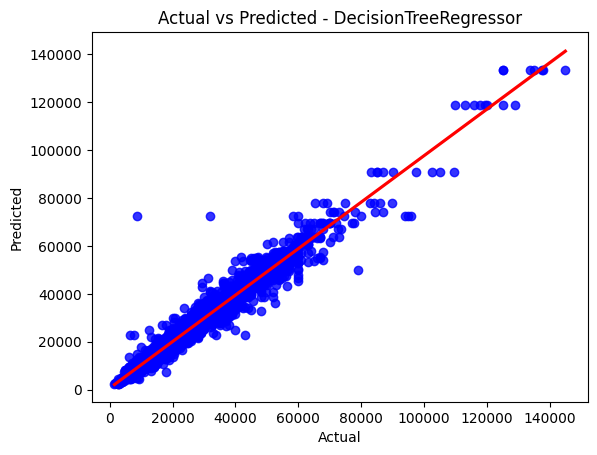

In [58]:
import seaborn as sns
sns.regplot(x=Y, y=y_pred_full, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()